# Human de novo mutations

### Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Questionn 2: Load files

In [2]:
# tell pandas to read the dataframes straight from the link:

df = pd.read_csv("aau1043_dnm.tsv")
df_parent_ages = pd.read_csv("aau1043_parental_age.tsv")


In [3]:
df_parent_ages

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


### Question 3: Mutations per proband

Count the number of de novo mutations per proband: 
- The Phase_combined column records the inferred parent of origin of the de novo mutation. 
- Break the counts of de novo mutations down into maternally inherited, paternally inherited, and total de novo mutations (including of unknown parental origin). 
- Store these counts in a new pandas dataframe with columns: Proband_id, pat_dnm, mat_dnm, tot_dnm.

In [4]:
# first, count the total number of proband_id (which will include all dnms, regardless of origin)
total_proband_counts = df["Proband_id"].value_counts()

In [10]:
# create df subsets for each dnm group
roi = df["Phase_combined"] == "father"
df_father_dnm = df.loc[roi, :]

roi = df["Phase_combined"] == "mother"
df_mother_dnm = df.loc[roi, :]


# count unique proband_id for each subset
father_dnm_per_proband = df_father_dnm["Proband_id"].value_counts()
mother_dnm_per_proband = df_mother_dnm["Proband_id"].value_counts()


In [16]:

# create new datafram combining each count series

df_totals = pd.DataFrame({"total_dnm":total_proband_counts, "pat_dnm":father_dnm_per_proband, "mat_dnm":mother_dnm_per_proband})
df_totals['Proband_id'] = df_totals.index #separates Proband_id into new column(not index)
df_totals = df_totals.reindex(columns= ['Proband_id', 'mat_dnm', 'pat_dnm','total_dnm']) #re-order columns

df_totals

,Proband_id,mat_dnm,pat_dnm,total_dnm
675,675,19,51,70
1097,1097,12,26,39
1230,1230,12,42,57
1481,1481,14,53,68
1806,1806,11,61,78
...,...,...,...,...
153657,153657,8,41,49
154565,154565,14,61,75
154621,154621,11,39,50
154810,154810,14,55,69


### Question 4: Merge with Parental Ages Data

Use the pandas `merge` function to combine the above data frame with the data frame with maternal and paternal ages

In [17]:
df_merged = pd.merge(df_totals, df_parent_ages, on='Proband_id')
df_merged

,Proband_id,mat_dnm,pat_dnm,total_dnm,Father_age,Mother_age
0,675,19,51,70,31,36
1,1097,12,26,39,19,19
2,1230,12,42,57,30,28
3,1481,14,53,68,32,20
4,1806,11,61,78,38,34
...,...,...,...,...,...,...
391,153657,8,41,49,27,23
392,154565,14,61,75,36,30
393,154621,11,39,50,19,18
394,154810,14,55,69,32,28


### Question 5: Plot by Age

Make plots to visualize de novo mutations vs. paternal and maternal ages

(0.0, 100.0)

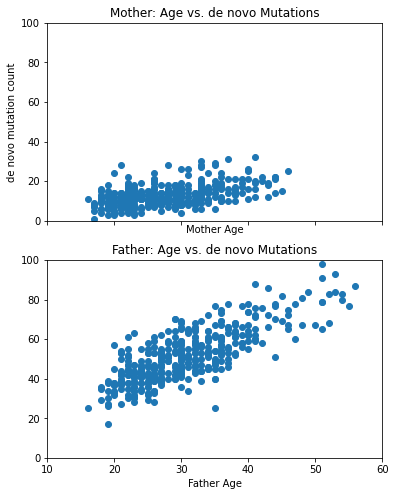

In [27]:
fig, ax = plt.subplots (nrows=2, figsize = (6, 8), sharex=True, sharey=True)
ax[0].scatter(x=df_merged['Mother_age'], y=df_merged['mat_dnm'])
ax[1].scatter(x=df_merged['Father_age'], y=df_merged['pat_dnm'])
ax[0].set_title("Mother: Age vs. de novo Mutations")
ax[1].set_title("Father: Age vs. de novo Mutations")
ax[0].set_xlabel("Mother Age")
ax[1].set_xlabel("Father Age")
ax[0].set_ylabel("de novo mutation count")
ax[0].set_xlim(10, 60)
ax[0].set_ylim(0, 100)

### Questions 6-7: Regression Modeling

Use ordinary least squares `smf.ols()` to test for an association between maternal age and maternally inherited de novo mutations. 

In [37]:
maternal_dnm_model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = df_merged)
results = maternal_dnm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        18:17:26   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is this relationship significant?

In [38]:
results.pvalues

Intercept     1.104177e-02
Mother_age    6.878208e-24
dtype: float64

Use ordinary least squares `smf.ols()` to test for an association between maternal age and maternally inherited de novo mutations. 

In [29]:
paternal_dnm_model = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = df_merged)
results = paternal_dnm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        18:03:30   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is this relationship significant?

In [30]:
results.pvalues

Intercept     3.079437e-09
Father_age    1.552294e-84
dtype: float64

### Question 8: Histogram



Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency

<function matplotlib.pyplot.show>

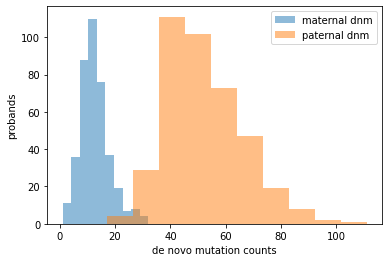

In [34]:
fig, ax = plt.subplots()
ax.hist(df_merged['mat_dnm'], alpha=0.5, label='maternal dnm')
ax.hist(df_merged['pat_dnm'], alpha=0.5, label='paternal dnm')
ax.set_xlabel("de novo mutation counts")
ax.set_ylabel("probands")
plt.legend()
plt.show

### Question 9: Significance test

In [35]:
stats.ttest_ind(df_merged['pat_dnm'], df_merged['mat_dnm'])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

Interpretation: p value is so low that getting such results by chance would be impossible